#### Lead Scoring Assignment: Logistic Regression
Name: GAGAN DHAL

I will be doing the following steps for this particular Assignment <br>

- Step1: Importing necessary python libraries and Reading the Dataset
- Step2: Inspect Dataset- Check the .shape, .info(), .describe()
- Step3: Check null values and dropping relevant columns
- Step4: Exploratory Data Analysis - countplot(), boxplot(), check outliers
- Step5: Varibale Transformation - binary mapping and one-hot encoding
- Step6: 
    - Train-Test Split
    - Scaling
    - correlation
- Step7: Model Building
    - Build a Logistic Regressiob model with all the variables. Compare Train and Test dataset
    - Use Recursive Feature Elimination(RFE) method to identify the top 20 significant variables
    - Build a model with top 20 features. 
    - Use VIF and coeffs to remove variables one by one to improve fit model.
- Step8: Model Evaluation
    - Accuracy, Sensitivit, Specificity, Recall, F1-Score
    - ROC Curve: Finding optimal cut-off
    - Calculating Lead Score (0-100)
    - Model Prediction on Test data

### Step1: Import Libraries & Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step2: Inspect Dataset

In [3]:
Leads.shape

(9240, 37)

In [4]:
# Checking the datatypes for each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step3. Check for Null Values and drop relevant columns

In [6]:
# Few columns have 'Select' as one of the values,ie, no option was selected.
# So we can treat them as null values.

# Replacing 'Select' wtih np.Nan
Leads = Leads.replace('Select', np.NaN)

In [7]:
# Checking null values for each column
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# There are lot of columns with large number of missing values. As industry practise I will drop the columns having
# more than 35% missing values

Leads.drop(['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace = True)


In [9]:
#Leads dataset shape after dropping relevant columns
Leads.shape

(9240, 27)

In [10]:
# Checking null values for each column again
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Imputing the missing value using mode for categorical variables

Leads['Country']= Leads['Country'].fillna(Leads['Country'].mode()[0])
Leads['What is your current occupation']= Leads['What is your current occupation'].fillna(Leads['What is your current occupation'].mode()[0])
Leads['What matters most to you in choosing a course']= Leads['What matters most to you in choosing a course'].fillna(Leads['What matters most to you in choosing a course'].mode()[0])

In [12]:
# For rest of the columns, the missing value is less than 2%, so I will drop the relevant rows
Leads.dropna(inplace=True)

In [13]:
# Checking null values again
round(100*Leads.isnull().sum()/len(Leads.index),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [14]:
Leads.shape

(9074, 27)

There are no more null values in the dataset. So I will proceed to the next step

### Step4. Exploratory Data Analysis

In [15]:
# Numerical columns in the dataset
num_cols = Leads.describe().columns
num_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

###### Univariate Analysis of Numerical columns

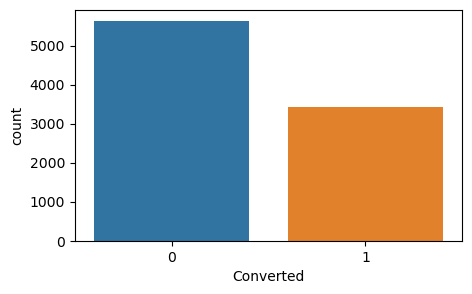

In [16]:
# Count plot of the target variable: 'Converted'
plt.figure(figsize=(5,3))
sns.countplot(Leads['Converted'])
plt.show()

Observation: We can say that our dataset if reasonably balanced

In [17]:
# Checking the Churn Rate, ie, Converted Rate
churn = round((sum(Leads['Converted'])/len(Leads['Converted'].index))*100,2)
print(f'The Chrun Rate or the Conversion Rate for the dataset is {churn} %')

The Chrun Rate or the Conversion Rate for the dataset is 37.86 %


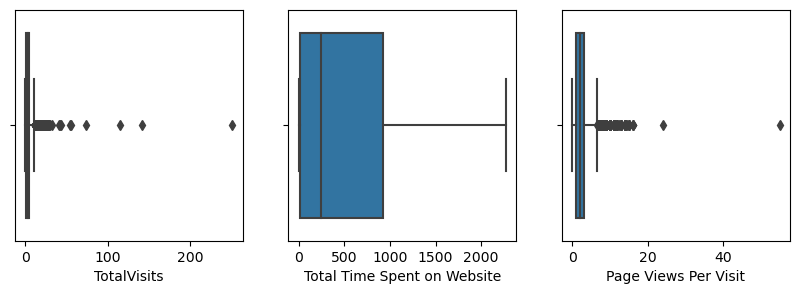

In [18]:
# Using Box Plot for the remaining numeric variables

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.boxplot(x = Leads['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(x = Leads['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(x = Leads['Page Views Per Visit'])
plt.show()

Observations: Outliers present in 'TotalVisits' & 'Pages Views Per Visit'

In [19]:
# Capping the outlier between 5 to 95% for 'TotalVisits' 

percentiles_1 = Leads['TotalVisits'].quantile([0.05,0.95]).values
Leads['TotalVisits'][Leads['TotalVisits'] <= percentiles_1[0]] = percentiles_1[0]
Leads['TotalVisits'][Leads['TotalVisits'] >= percentiles_1[1]] = percentiles_1[1]

In [20]:
# Capping the outlier between 5 to 95% for 'Page Views Per Visit'

percentiles_2 = Leads['Page Views Per Visit'].quantile([0.05,0.95]).values
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] <= percentiles_2[0]] = percentiles_2[0]
Leads['Page Views Per Visit'][Leads['Page Views Per Visit'] >= percentiles_2[1]] = percentiles_2[1]

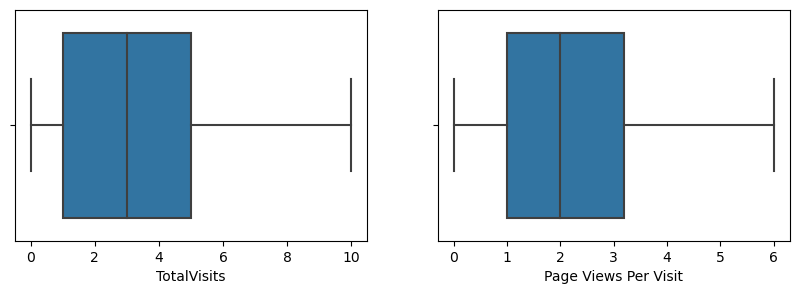

In [21]:
# Rechecking Box Plot outliers to ensure the outliers are handeled

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(x = Leads['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(x = Leads['Page Views Per Visit'])
plt.show()

###### Categorical Variables: using value_counts() and countplot()

In [22]:
# Categorical Columns in the dataset are:
cat_cols = list(set(Leads.columns) - set(num_cols))
cat_cols

['Lead Source',
 'Newspaper',
 'Search',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'Prospect ID',
 'Do Not Email',
 'Country',
 'Through Recommendations',
 'Last Activity',
 'A free copy of Mastering The Interview',
 'X Education Forums',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Lead Origin',
 'What matters most to you in choosing a course',
 'Magazine',
 'Digital Advertisement',
 'What is your current occupation',
 'Last Notable Activity']

###### I agree to pay the amount through cheque

In [23]:
Leads['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

Observation: No inference can be drawn, since all are No. So we can drop the variable

###### Update me on Supply Chain Content

In [24]:
Leads['Update me on Supply Chain Content'].value_counts(normalize=True)*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

Observation: No inference can be drawn, since all are No. So we can drop the variable

###### What matters most to you in choosing a course

In [25]:
Leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.977959
Flexibility & Convenience     0.011020
Other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'Better Career Prospects'. So we can drop the variable

###### Country

In [26]:
Leads['Country'].value_counts(normalize=True)*100

India                   96.837117
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Hong Kong                0.077143
Bahrain                  0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
South Africa             0.044082
Nigeria                  0.044082
Germany                  0.044082
Kuwait                   0.044082
Canada                   0.044082
Sweden                   0.033061
China                    0.022041
Asia/Pacific Region      0.022041
Uganda                   0.022041
Bangladesh               0.022041
Italy                    0.022041
Belgium                  0.022041
Netherlands              0.022041
Ghana                    0.022041
Philippines              0.022041
Russia                   0.011020
Switzerland   

Observation: Majority of the values belong to India(97%) while the rest are all below 1%. So we cant draw much inference from the data. Hence we can drop the variable

###### Digital Advertisement

In [27]:
Leads['Digital Advertisement'].value_counts(normalize=True)*100

No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### Search

In [28]:
Leads['Search'].value_counts(normalize=True)*100

No     99.845713
Yes     0.154287
Name: Search, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### Receive More Updates About Our Courses

In [29]:
Leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### Last Activity

In [30]:
Leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

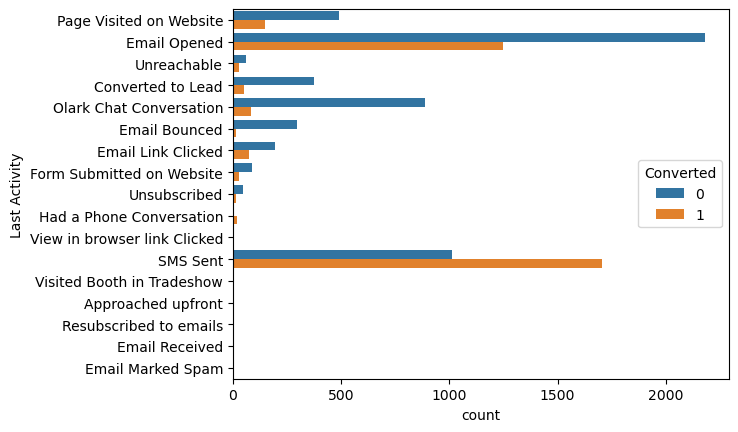

In [31]:
sns.countplot(y = Leads['Last Activity'], hue = Leads['Converted'])
plt.show()

Observations: 'SMS Sent' & 'Email Opened' results in most likely for lead to be converted

###### Lead Source

In [32]:
Leads['Lead Source'].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

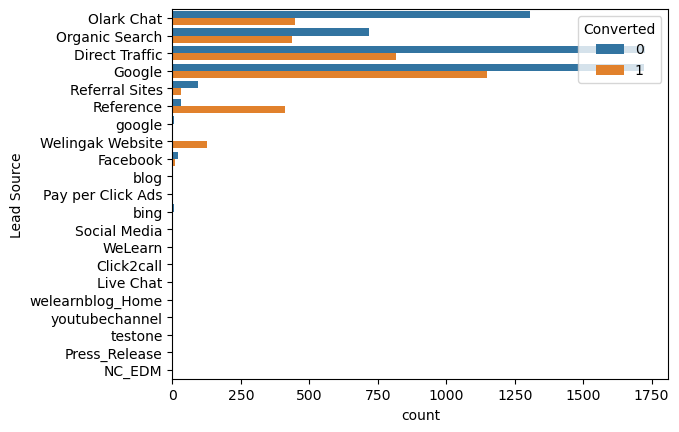

In [33]:
sns.countplot(y = Leads['Lead Source'], hue = Leads['Converted'])
plt.show()

Observations: 'Lead Sources' such as Google, Direct Traffic, Olark Chat, Organic Search and References can be targeted to increase the conversion rate

###### Get updates on DM Content

In [34]:
Leads['Get updates on DM Content'].value_counts(normalize=True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### Newspaper Article

In [35]:
Leads['Newspaper Article'].value_counts(normalize=True)*100

No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### Do Not Call

In [36]:
Leads['Do Not Call'].value_counts(normalize=True)*100

No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64

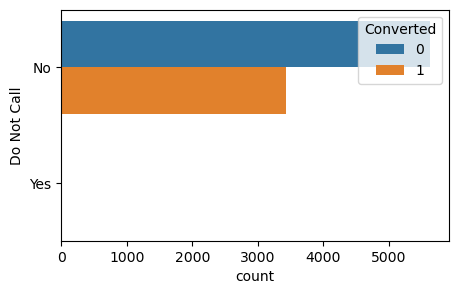

In [37]:
plt.figure(figsize=(5,3))
sns.countplot(y = Leads['Do Not Call'], hue = Leads['Converted'])
plt.show()

Observation: Those choosing to recieve calls can be targetted

###### X Education Forums

In [38]:
Leads['X Education Forums'].value_counts(normalize=True)*100

No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### Lead Origin

In [39]:
Leads['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

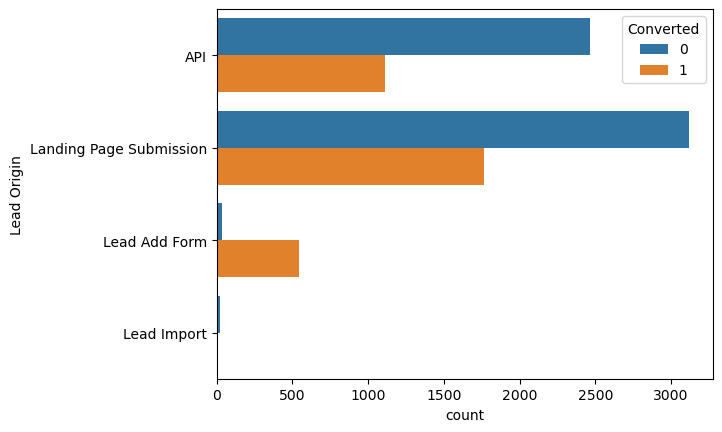

In [40]:
sns.countplot(y = Leads['Lead Origin'], hue = Leads['Converted'])
plt.show()

Observations: Landing Page Submission, API and Lead Add Form can be targeted to increase the conversion rate

###### Last Notable Activity

In [41]:
Leads['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

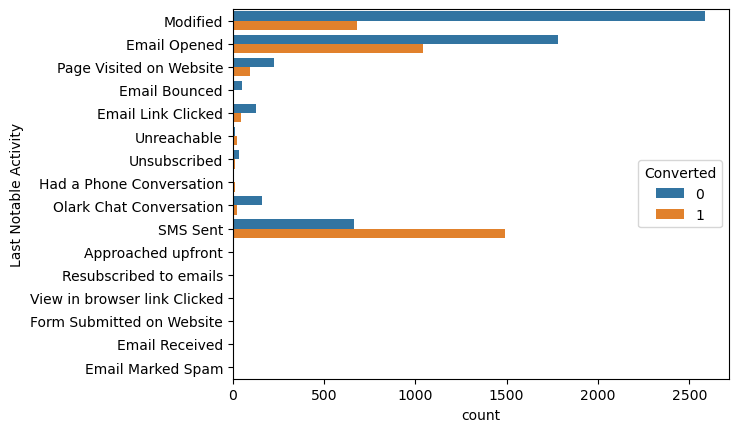

In [42]:
sns.countplot(y = Leads['Last Notable Activity'], hue = Leads['Converted'])
plt.show()

Observations: For 'Last Notable Activity', SMS Sent,Email Opened & Modified refults in higher conversion chances

###### Do Not Email

In [43]:
Leads['Do Not Email'].value_counts(normalize=True)*100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

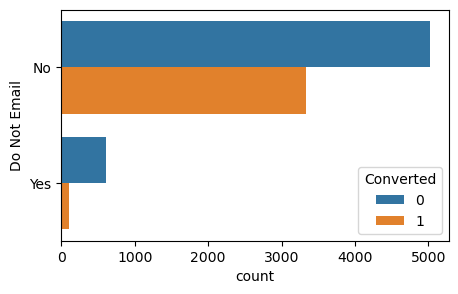

In [44]:
plt.figure(figsize=(5,3))
sns.countplot(y = Leads['Do Not Email'], hue = Leads['Converted'])
plt.show()

Observation: Those choosing to receive email, result in higher conversion rate

###### What is your current occupation

In [45]:
Leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

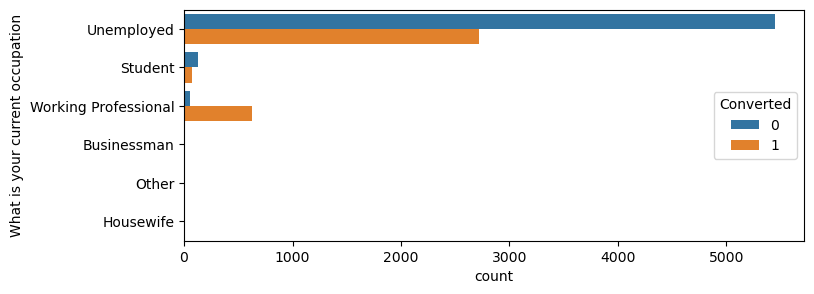

In [46]:
plt.figure(figsize=(8,3))
sns.countplot(y = Leads['What is your current occupation'], hue = Leads['Converted'])
plt.show()

Observations: 'Unemployed' followed by 'Working Professional' should be targeted to increase conversion rate

###### Newspaper

In [47]:
Leads['Newspaper'].value_counts(normalize=True)*100

No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### A free copy of Mastering The Interview

In [48]:
Leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64

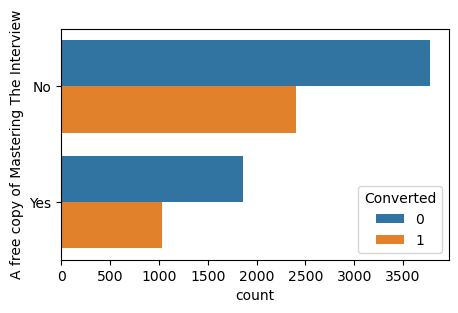

In [49]:
plt.figure(figsize=(5,3))
sns.countplot(y = Leads['A free copy of Mastering The Interview'], hue = Leads['Converted'])
plt.show()

###### Through Recommendations

In [50]:
Leads['Through Recommendations'].value_counts(normalize=True)*100

No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

###### Magazine

In [51]:
Leads['Magazine'].value_counts(normalize=True)*100

No    100.0
Name: Magazine, dtype: float64

Observation: No inference can be drawn, since most of the values belong to 'No'. So we can drop the variable

In [52]:
# Dropping relevant columns
Leads.drop(['Lead Number','I agree to pay the amount through cheque','Update me on Supply Chain Content', 'What matters most to you in choosing a course',
'Country','Digital Advertisement','Search','Receive More Updates About Our Courses','Get updates on DM Content',
'Newspaper Article','X Education Forums','Newspaper','Through Recommendations','Magazine'], axis=1, inplace=True)


In [53]:
# Dataset shape after dropping relevant columns
Leads.shape

(9074, 13)

In [54]:
Leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [55]:
# Checking datatype of final dataset
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

### Step5 : Variable Transformation: Binary Mapping, Dummy variables/One-Hot Encoding

##### Mapping the columns with binary output(Yes/No) to (1/0)

In [56]:
# Columns with binary output
bin_var = ['Do Not Email','Do Not Call','A free copy of Mastering The Interview']

In [57]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the relevant columns
Leads[bin_var] = Leads[bin_var].apply(binary_map)

In [58]:
Leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


##### For the remaining categorical columns I will apply one-hot encoding

In [59]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
                              'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Leads = pd.concat([Leads, dummy1], axis=1)

# Dropping the original columns
Leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
                              'Last Notable Activity'], axis=1, inplace = True)

In [60]:
Leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
Leads.shape

(9074, 67)

### Step 6: Test-Train Split

In [62]:
# Putting feature variable to X
X = Leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
# Putting response variable to y
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scaling relevant numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


###### Looking at Correlations

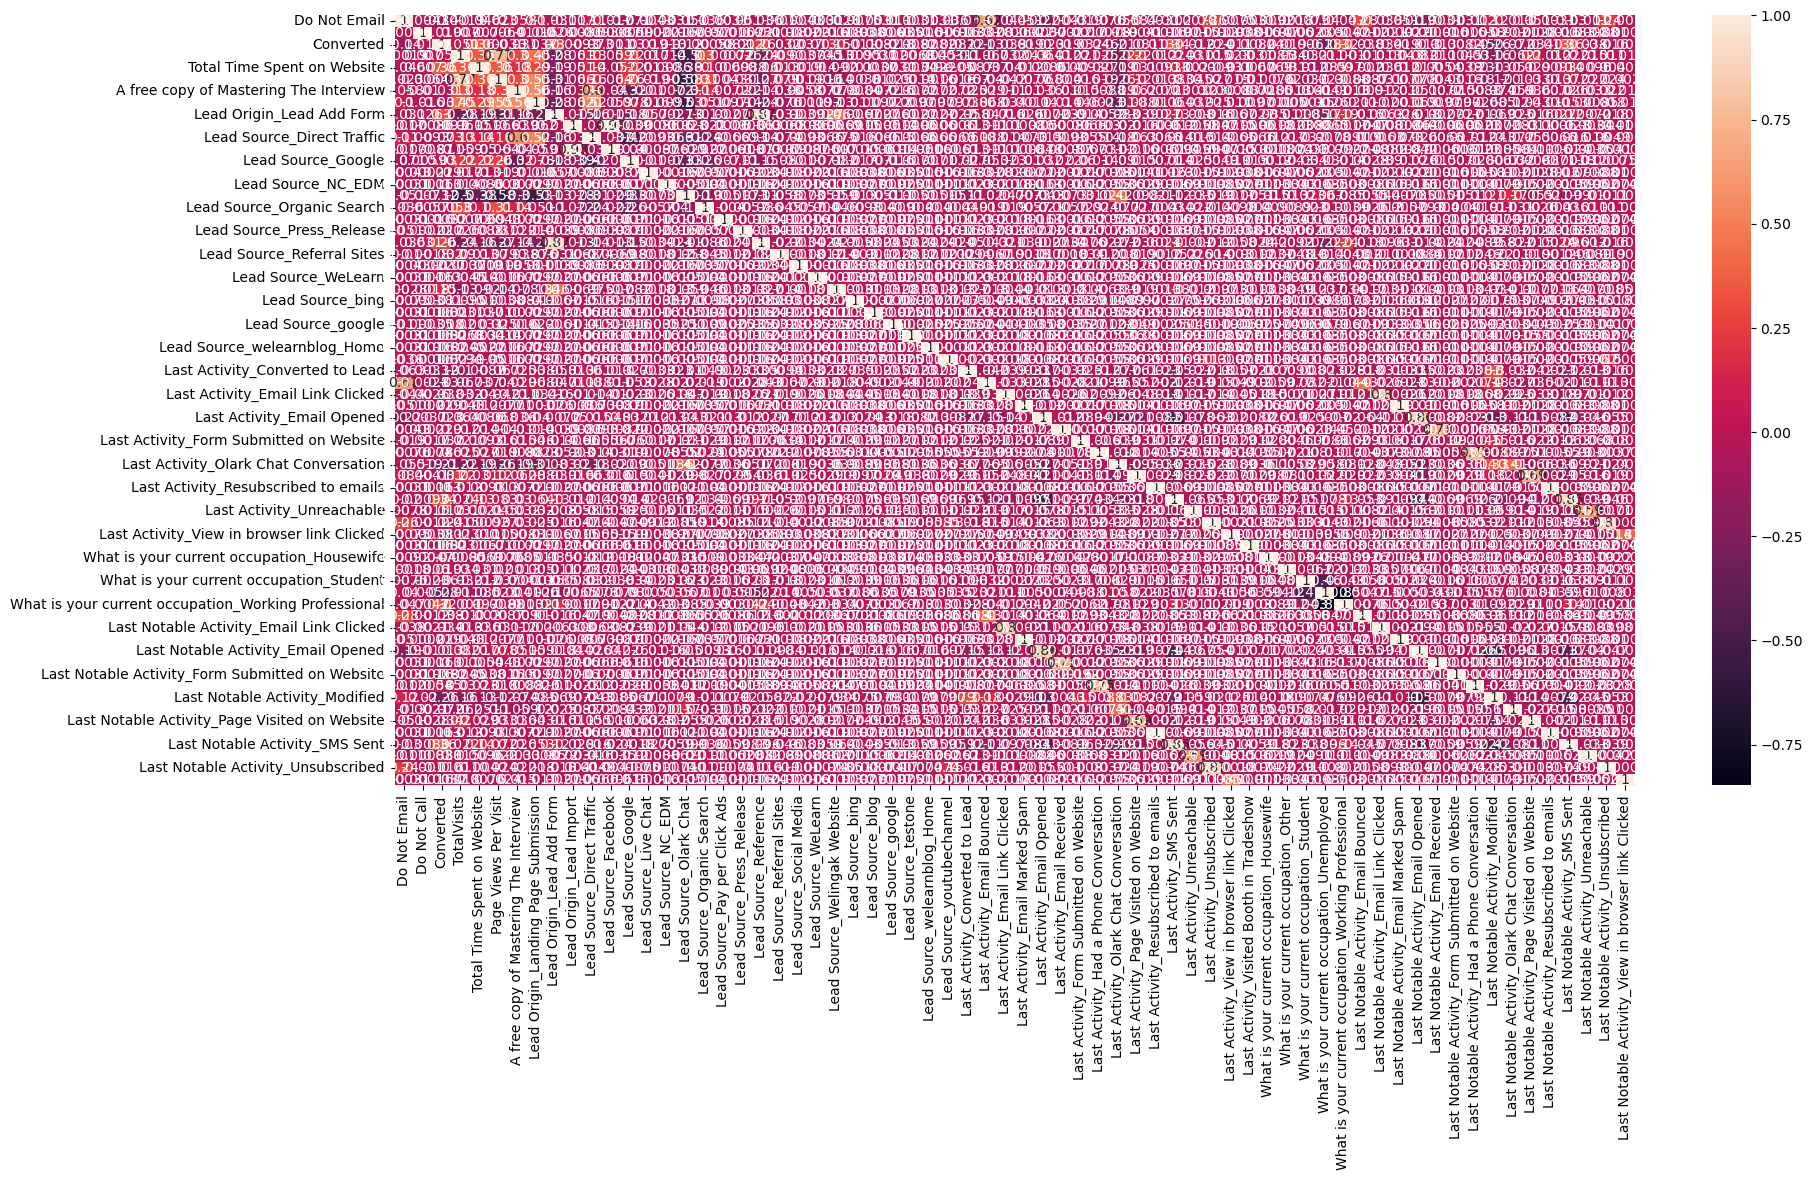

In [66]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(Leads.corr(),annot = True)
plt.show()

### Step 7: Model Building

######  Model1: First model using all the variables

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6288
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.0
Date:                Thu, 09 Mar 2023   Deviance:                       5140.1
Time:                        11:30:00   Pearson chi2:                 6.37e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   26.1109   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5434      0.225     -6.861      0.000      -1.984      -1.103
Do Not Call                                             23.0793   5.31e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                              0.3398      0.056      6.015      0.000       0.229       0.451
Total Time Spent on Website                              1.1270      0.041     27.377      0.000       1.046       1.208
Page Views Per Visit                                    -0.2752      0.063     -4.359      0.000      -0.399      -0.151
A free copy of Mastering The Interview                  -0.0238      0.108     -0.221      0.825      -0.236       0.188
Lead Origin_Landing Page Submission                     -0.1704      0.108     -1.577      0.115      -0.382       0.041
Lead Origin_Lead Add Form                               -0.2061      1.706     -0.121      0.904      -3.550       3.137
Lead Origin_Lead Import                                 25.2970   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -3.0113      2.139     -1.408      0.159      -7.204       1.181
Lead Source_Facebook                                   -26.7436   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.7011      2.138     -1.263      0.206      -6.891       1.489
Lead Source_Live Chat                                   21.6089   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      20.5407   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.7289      2.131     -0.811      0.417      -5.906       2.448
Lead Source_Organic Search                              -2.9870      2.141     -1.395      0.163      -7.183       1.209
Lead Source_Pay per Click Ads                          -24.2461   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -24.6955   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.1385      1.299      0.876      0.381      -1.408       3.685
Lead Source_Referral Sites                              -3.2153      2.163     -1.487      0.137      -7.455       1.024
Lead Source_Social Media                                -0.4379      2.585     -0.169      0.865      -5.504       4.629
Lead Source_WeLearn                                  -1.68

Observations:  Most of the variables have high coeff and P-values

###### Feature Selection Using RFE: selecting top 20 variables

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 42),
 ('Lead Source_blog', False, 19),
 ('Lead S

In [73]:
# Top 20 Features
col = X_train.columns[rfe.support_]

In [74]:
# Remaining Features
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable'

###### Model2: using top 20 features

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.1
Date:                Thu, 09 Mar 2023   Deviance:                       5246.2
Time:                        11:30:09   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3765      0.603      2.282      0.022       0.194       2.559
Do Not Email                                            -1.6059      0.200     -8.040      0.000      -1.997      -1.214
Total Time Spent on Website                              1.1340      0.041     27.904      0.000       1.054       1.214
Lead Origin_Lead Add Form                                2.1380      0.927      2.308      0.021       0.322       3.954
Lead Origin_Lead Import                                  1.5445      0.457      3.378      0.001       0.648       2.441
Lead Source_Olark Chat                                   1.2434      0.104     11.904      0.000       1.039       1.448
Lead Source_Reference                                    1.8217      0.951      1.915      0.056      -0.043       3.686
Lead Source_Welingak Website                             3.8664      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1086      0.228     -4.857      0.000      -1.556      -0.661
Last Activity_Email Bounced                             -1.2769      0.425     -3.002      0.003      -2.111      -0.443
Last Activity_Had a Phone Conversation                   1.9240      0.783      2.458      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3307      0.191     -6.983      0.000      -1.704      -0.957
What is your current occupation_Housewife               21.6424   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.7930      0.638     -1.242      0.214      -2.044       0.458
What is your current occupation_Unemployed              -1.1988      0.599     -2.001      0.045      -2.373      -0.024
What is your current occupation_Working Professional     1.5641      0.626      2.498      0.012       0.337       2.791
Last Notable Activity_Email Link Clicked                -1.8842      0.255     -7.377      0.000      -2.385      -1.384
Last Notable Activity_Email Opened                      -1.4250      0.088    -16.122      0.000      -1.598      -1.252
Last Notable Activity_Modified                          -1.7447      0.100    -17.394      0.000      -1.941      -1.548
Last Notable Activity_Olark Chat Conversation           -1.5331      0.369     -4.152      0.000      -2.257      -0.809
Last Notable Activity_Page Visited on Website           -1.6991      0.202     -8.399      0.000      -2.096      -1.303
========================================================================================================================
"""

#### Checking VIFs

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.09
6,Lead Source_Welingak Website,15.47
13,What is your current occupation_Unemployed,4.40
17,Last Notable Activity_Modified,3.09
16,Last Notable Activity_Email Opened,2.27
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


Observation: <br>

- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.
- The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [78]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

###### Model3: after dropping 'Lead Origin_Lead Add Form'

In [79]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.0
Date:                Thu, 09 Mar 2023   Deviance:                       5252.1
Time:                        11:30:10   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3787      0.603      2.288      0.022       0.198       2.560
Do Not Email                                            -1.6095      0.200     -8.064      0.000      -2.001      -1.218
Total Time Spent on Website                              1.1312      0.041     27.884      0.000       1.052       1.211
Lead Origin_Lead Import                                  1.5379      0.457      3.364      0.001       0.642       2.434
Lead Source_Olark Chat                                   1.2410      0.104     11.899      0.000       1.037       1.445
Lead Source_Reference                                    3.9536      0.229     17.236      0.000       3.504       4.403
Lead Source_Welingak Website                             5.9983      0.728      8.235      0.000       4.571       7.426
Last Activity_Converted to Lead                         -1.1105      0.228     -4.868      0.000      -1.558      -0.663
Last Activity_Email Bounced                             -1.2761      0.425     -3.001      0.003      -2.110      -0.443
Last Activity_Had a Phone Conversation                   1.9193      0.783      2.452      0.014       0.385       3.453
Last Activity_Olark Chat Conversation                   -1.3340      0.190     -7.003      0.000      -1.707      -0.961
What is your current occupation_Housewife               21.6409   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.7935      0.638     -1.244      0.214      -2.044       0.457
What is your current occupation_Unemployed              -1.1959      0.599     -1.997      0.046      -2.369      -0.022
What is your current occupation_Working Professional     1.5630      0.626      2.498      0.012       0.337       2.789
Last Notable Activity_Email Link Clicked                -1.8878      0.255     -7.394      0.000      -2.388      -1.387
Last Notable Activity_Email Opened                      -1.4259      0.088    -16.137      0.000      -1.599      -1.253
Last Notable Activity_Modified                          -1.7455      0.100    -17.408      0.000      -1.942      -1.549
Last Notable Activity_Olark Chat Conversation           -1.5326      0.369     -4.153      0.000      -2.256      -0.809
Last Notable Activity_Page Visited on Website           -1.6852      0.201     -8.370      0.000      -2.080      -1.291
========================================================================================================================
"""

In [80]:
##### Checking the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,4.40
16,Last Notable Activity_Modified,3.09
15,Last Notable Activity_Email Opened,2.27
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
3,Lead Source_Olark Chat,1.78
7,Last Activity_Email Bounced,1.76
17,Last Notable Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.32
13,What is your current occupation_Working Profes...,1.31


Observations: <br>

- The VIF are low for all,ie, less than 5.
- However some of variables have high coeff values 
- 'What is your current occupation_Housewife' has the highest coeff(21.6409) and P>|z|= 0.999. So we will remove it and rerun the model

In [81]:
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

###### Model4: after dropping 'What is your current occupation_Housewife'

In [82]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.9
Date:                Thu, 09 Mar 2023   Deviance:                       5255.8
Time:                        11:30:11   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8089      0.557      3.250      0.001       0.718       2.900
Do Not Email                                            -1.6124      0.200     -8.069      0.000      -2.004      -1.221
Total Time Spent on Website                              1.1301      0.041     27.879      0.000       1.051       1.210
Lead Origin_Lead Import                                  1.5356      0.457      3.359      0.001       0.640       2.432
Lead Source_Olark Chat                                   1.2390      0.104     11.882      0.000       1.035       1.443
Lead Source_Reference                                    3.9575      0.229     17.263      0.000       3.508       4.407
Lead Source_Welingak Website                             5.9978      0.728      8.234      0.000       4.570       7.425
Last Activity_Converted to Lead                         -1.1074      0.228     -4.856      0.000      -1.554      -0.660
Last Activity_Email Bounced                             -1.2719      0.425     -2.990      0.003      -2.106      -0.438
Last Activity_Had a Phone Conversation                   1.9202      0.783      2.453      0.014       0.386       3.454
Last Activity_Olark Chat Conversation                   -1.3336      0.191     -6.996      0.000      -1.707      -0.960
What is your current occupation_Student                 -1.2239      0.595     -2.058      0.040      -2.389      -0.059
What is your current occupation_Unemployed              -1.6257      0.552     -2.943      0.003      -2.708      -0.543
What is your current occupation_Working Professional     1.1329      0.581      1.949      0.051      -0.007       2.272
Last Notable Activity_Email Link Clicked                -1.8845      0.255     -7.395      0.000      -2.384      -1.385
Last Notable Activity_Email Opened                      -1.4237      0.088    -16.119      0.000      -1.597      -1.251
Last Notable Activity_Modified                          -1.7482      0.100    -17.433      0.000      -1.945      -1.552
Last Notable Activity_Olark Chat Conversation           -1.5318      0.369     -4.151      0.000      -2.255      -0.809
Last Notable Activity_Page Visited on Website           -1.6879      0.201     -8.386      0.000      -2.082      -1.293
========================================================================================================================
"""

In [83]:
##### Checking the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.37
15,Last Notable Activity_Modified,3.08
14,Last Notable Activity_Email Opened,2.25
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
3,Lead Source_Olark Chat,1.78
7,Last Activity_Email Bounced,1.76
16,Last Notable Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.32
12,What is your current occupation_Working Profes...,1.31


Observation: <br>

- The VIF for all the variables are still less than 5
- The P>|z| have also significant reduced

So we dont need to drop any more variables

In [84]:
# Making prediction for the train dataset using our final model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.19441927, 0.36522595, 0.20912253, 0.88497854, 0.67155271,
       0.77194483, 0.09652512, 0.9117254 , 0.86491297, 0.6306063 ])

In [85]:
# Creating a dataframe using Prospect ID and  it Coverted values(for train data) and the Converted_prob(predicted)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.194419,3009
1,0,0.365226,1012
2,0,0.209123,9226
3,1,0.884979,4750
4,1,0.671553,7987


In [86]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.194419,3009,0
1,0,0.365226,1012,0
2,0,0.209123,9226,0
3,1,0.884979,4750,1
4,1,0.671553,7987,1


In [87]:
# Calculating the confusion matrix for the train dataset
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 730, 1716]], dtype=int64)

In [88]:
# Actual/Predicted     not_churn    churn
        # not_churn        3459      446
        # churn            730       1716  

In [89]:
# Calculating the overall accuracy of the training dataset
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.814832309872461

#### Using other evaluation metrics for checking model performace

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
print(f"The Sensitivity of the final mode is {round((TP / float(TP+FN))*100,2)} %")
print(f"The Specificity of the final mode is {round((TN / float(TN+FP))*100,2)} %")
print(f"The False Positive Rate,ie, predicted churn but actuall did not churn is {round((FP/ float(TN+FP))*100,2)} %")

The Sensitivity of the final mode is 70.16 %
The Specificity of the final mode is 88.58 %
The False Positive Rate,ie, predicted churn but actuall did not churn is 11.42 %


In [92]:
print(f" The positive predictive value is {round((TP / float(TP+FP))*100,2)} %")
print(f" The Negative predictive value is {round((TN / float(TN+ FN))*100,2)} %")

 The positive predictive value is 79.37 %
 The Negative predictive value is 82.57 %


##### Plotting the ROC curve

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

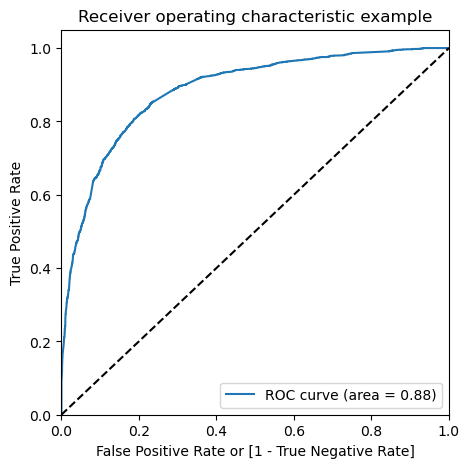

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### Finding Optimal Cutoff Point: getting a balance between sensitivity and specificity

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.194419,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.365226,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.209123,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.884979,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.671553,7987,1,1,1,1,1,1,1,1,0,0,0


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.595339  0.969747  0.360819
0.2   0.2  0.749488  0.918234  0.643790
0.3   0.3  0.799559  0.843827  0.771831
0.4   0.4  0.813258  0.769828  0.840461
0.5   0.5  0.814832  0.701554  0.885787
0.6   0.6  0.809951  0.638594  0.917286
0.7   0.7  0.780507  0.511856  0.948784
0.8   0.8  0.763974  0.435405  0.969782
0.9   0.9  0.714218  0.275552  0.988988


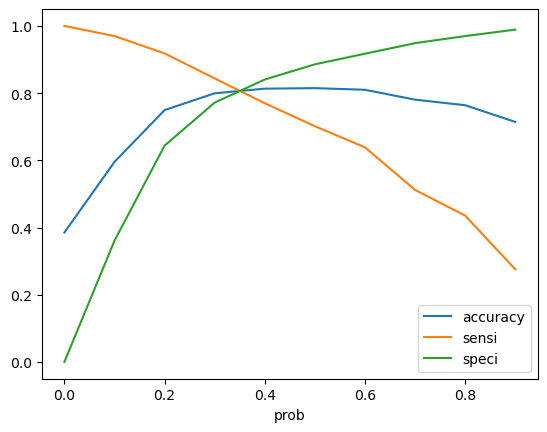

In [97]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.194419,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.365226,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.209123,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.884979,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.671553,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [99]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8132577546843017

There is not much change in accuracy when cutoff changed from 0.5 to 0.4

In [100]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3282,  623],
       [ 563, 1883]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
print(f"The Sensitivity of the final mode is {round((TP / float(TP+FN))*100,2)} %")
print(f"The Specificity of the final mode is {round((TN / float(TN+FP))*100,2)} %")
print(f"The False Positive Rate,ie, predicted churn but actuall did not churn is {round((FP/ float(TN+FP))*100,2)} %")

The Sensitivity of the final mode is 76.98 %
The Specificity of the final mode is 84.05 %
The False Positive Rate,ie, predicted churn but actuall did not churn is 15.95 %


In [103]:
print(f" The positive predictive value is {round((TP / float(TP+FP))*100,2)} %")
print(f" The Negative predictive value is {round((TN / float(TN+ FN))*100,2)} %")

 The positive predictive value is 75.14 %
 The Negative predictive value is 85.36 %


In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 730, 1716]], dtype=int64)

In [105]:
# Precision: TP / TP + FP
print(f" The Precision for our mode is {round((confusion[1,1]/(confusion[0,1]+confusion[1,1])*100),2)}%")

#Recall: TP / TP + FN
print(f" The Recall for our mode is {round((confusion[1,1]/(confusion[1,0]+confusion[1,1])*100),2)}%")

 The Precision for our mode is 79.37%
 The Recall for our mode is 70.16%


##### Precision and recall tradeoff

In [106]:
from sklearn.metrics import precision_recall_curve

In [107]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

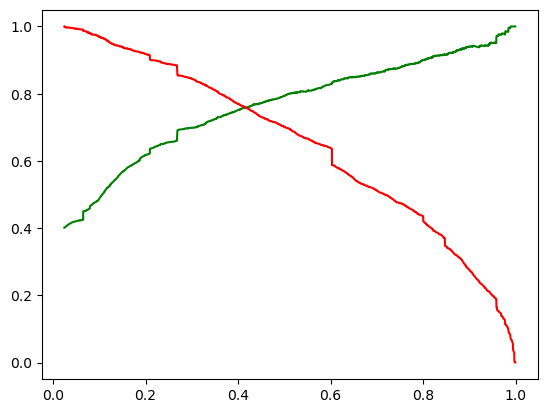

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

In [110]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [111]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [112]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [113]:
y_test_pred = res.predict(X_test_sm)

In [114]:
y_test_pred[:10]

3271    0.127951
1490    0.974693
7936    0.109946
4216    0.856929
3830    0.129580
1800    0.661814
6507    0.365042
4821    0.303520
4223    0.958372
4714    0.209123
dtype: float64

In [115]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [116]:
# Let's see the head
y_pred_1.head()

,0
3271,0.127951
1490,0.974693
7936,0.109946
4216,0.856929
3830,0.129580


In [117]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [118]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [121]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.127951
1,1,1490,0.974693
2,0,7936,0.109946
3,1,4216,0.856929
4,0,3830,0.129580


In [122]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead Score'})

In [123]:
#Calulating the lead score from the probability
y_pred_final['Lead Score']= y_pred_final['Lead Score'].apply(lambda x: x*100)
y_pred_final['Lead Score']= round(y_pred_final['Lead Score'],2)
y_pred_final

,Converted,Prospect ID,Lead Score
0,0,3271,12.80
1,1,1490,97.47
2,0,7936,10.99
3,1,4216,85.69
4,0,3830,12.96
...,...,...,...
2718,0,850,12.37
2719,0,2879,7.90
2720,1,6501,91.28
2721,0,7155,18.22


In [124]:
y_pred_final['final_predicted'] = y_pred_final['Lead Score'].map(lambda x: 1 if x > 40 else 0)

In [125]:
y_pred_final.head()

,Converted,Prospect ID,Lead Score,final_predicted
0,0,3271,12.80,0
1,1,1490,97.47,1
2,0,7936,10.99,0
3,1,4216,85.69,1
4,0,3830,12.96,0


In [126]:
#Checking the overall accuracy 
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8141755416819684

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1455,  279],
       [ 227,  762]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
print(f"The Sensitivity of our Logistic Regression Model is: {round((TP / float(TP+FN)*100),2)}%")
print(f"The Specificity of our Logistic Regression Model is: {round((TN / float(TN+FP)*100),2)}%")

The Sensitivity of our Logistic Regression Model is: 77.05%
The Specificity of our Logistic Regression Model is: 83.91%


In [132]:
hot_leads=y_pred_final.loc[y_pred_final["Lead Score"]>=85]
hot_leads

,Converted,Prospect ID,Lead Score,final_predicted
1,1,1490,97.47,1
3,1,4216,85.69,1
8,1,4223,95.84,1
21,1,2461,99.44,1
23,1,5822,99.73,1
...,...,...,...,...
2694,1,1566,95.64,1
2699,1,6461,90.10,1
2703,1,5741,92.30,1
2715,1,6299,89.16,1


In [133]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 7674, 8596, 4003, 4963, 6947, 4807,  446,
        789, 8372, 5805, 3758,  337, 1561,  737, 9034, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 6532, 4498, 5797, 8687, 7653,   76, 3307, 3976, 5769, 1663,
       3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481, 3265, 3285,
       2460, 3858, 8106,  373, 3055, 7417, 4179, 8568, 7268, 4353, 6784,
       6754, 7236, 2960, 7753, 3983,  802, 8745, 4717, 8509, 6094, 4992,
       7036, 2680, 7065,  112, 3827, 7175, 1675, 6999, 5826, 8492, 6499,
       3439, 4612, 7129, 4793, 1557, 2495,  822, 2378, 5090, 5075, 7699,
       5638, 8077, 2727,  720, 2961, 1542, 5656, 6728, 8205, 6332, 8461,
       5135, 2427,  174, 2674, 8065, 1568, 8597, 4865, 4708, 1304, 6066,
       6538, 5700, 1388, 5815, 7970, 7902, 5804, 5042, 4081, 6684, 5032,
       5824,   64,  170, 2650, 5808, 4578, 4803, 14

In [134]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.997817
Lead Source_Reference                                   3.957504
Last Activity_Had a Phone Conversation                  1.920198
const                                                   1.808949
Lead Origin_Lead Import                                 1.535603
Lead Source_Olark Chat                                  1.239038
What is your current occupation_Working Professional    1.132863
Total Time Spent on Website                             1.130145
Last Activity_Converted to Lead                        -1.107398
What is your current occupation_Student                -1.223909
Last Activity_Email Bounced                            -1.271875
Last Activity_Olark Chat Conversation                  -1.333646
Last Notable Activity_Email Opened                     -1.423708
Last Notable Activity_Olark Chat Conversation          -1.531826
Do Not Email                                           -1.612358
What is your current occu